<a href="https://colab.research.google.com/github/Isaac-Jacobson/220Recitation1/blob/main/FlakeDetector2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Peter's speel
First, the images are put through various preprocessing steps in order to isolate
the snowflakes from background information like flashes, water dripping down the sides,
or rain drops, and then to crop out a 200x200 image containing the largest snowflake
visible in the image. The first preprocessing step is to calculate the histogram of the
image and if enough pixels have the value 255 that is an indicator that there is a flash or
glare taking up a significant portion of the image. If that is the case, the entire image is
iterated over via a given window size (currently set to 400 pixels by 400 pixels) and
calculated the sum of the intensities inside that window. If the average of the pixel
intensity within that window is above a given threshold (currently set to 40) all the pixels
in that window get set to 0. Then the entire image gets thresholded such that any pixels
below a second threshold (currently set to 150) gets set to 0. At this point, large flashes
and glares like those seen in images from camera angle 0 will have been set to 0 in the
image. That is the end of the conditional execution based on the histogram and the rest
of the process is applied to all the images regardless of their initial histogram. From
there, images get thresholded so that any pixels below the first threshold (currently set to
40) get set to 0. This step helps remove dark gray things in the image like raindrops or
some parts of the background. Then, iterate over the entire image with a different
window size (currently set to 20 pixels by 20 pixels) and calculate the average intensity
of the pixels within the image. If the average intensity is greater than a third threshold
(currently set to 40) then set all the pixels in that window to 255. This will help keep
entire snowflakes together as one connected component when bounding boxes are
drawn around connected components. Then, use canny edge detection with thresholds
currently set to 0 and 250 to create an image containing the edges of the objects in the
image. These edges should look a bit like a tetris block or something from an atari game
that almost completely covers the snowflake because of the previous step. Then, draw a
bounding box on the original image at the coordinates of the bounding box around the
largest connected component in the image of the edges. Crop the original image down
to a 200x200 pixel image centered on the center of the bounding box, being careful to
adjust if the center of the bounding box is fewer than 100 pixels from any edges. Save
the new, cropped image.


In [ ]:
from copy import deepcopy
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os
from google.colab.patches import cv2_imshow


In [ ]:
#Coefficients
stepSize = 400 #Step for removing flash and other big bright sections
stepSize2 = 20 #Step for finding snowflakes
threshold1 = 40 
threshold2 = 150
threshold3 = 40

dimensionX = 300
dimensionY = 300

#directory = "testImages"
#dir_list = os.listdir(directory)

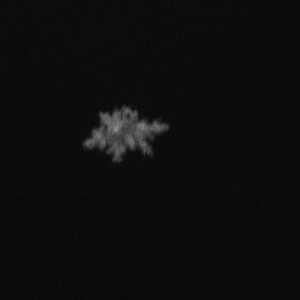

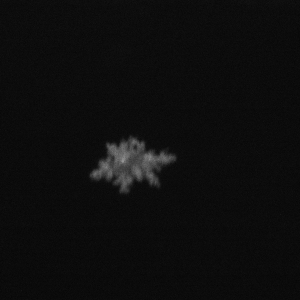

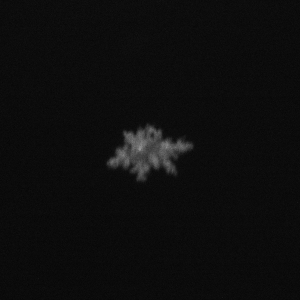

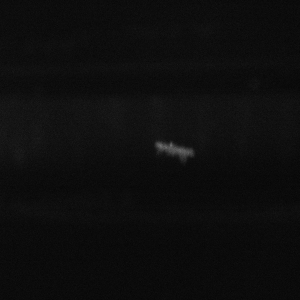

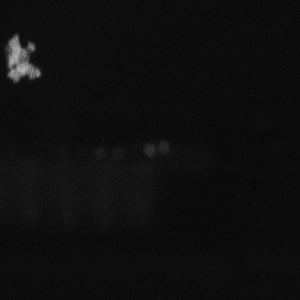

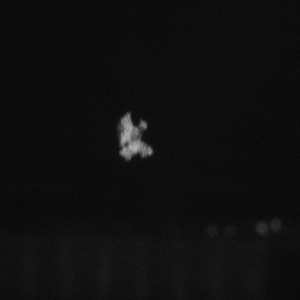

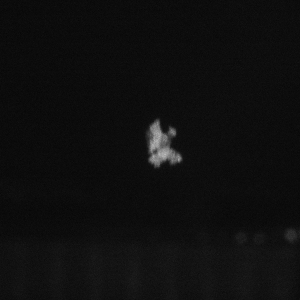

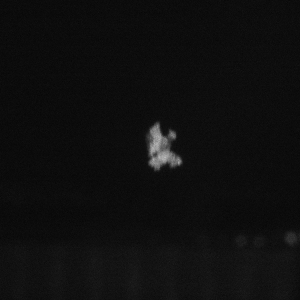

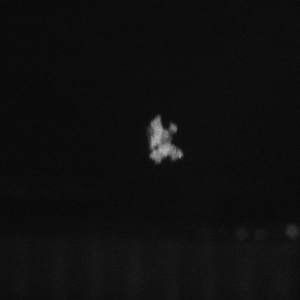

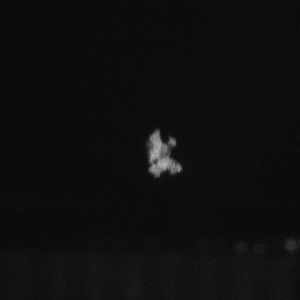

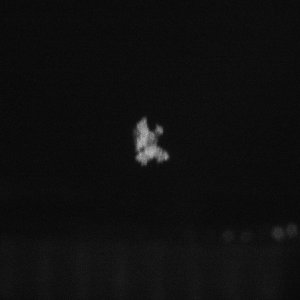

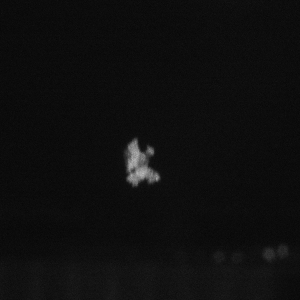

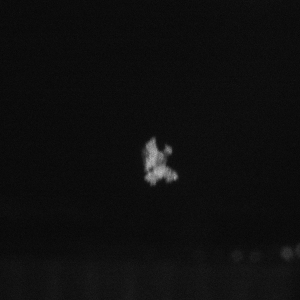

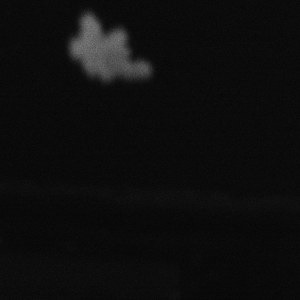

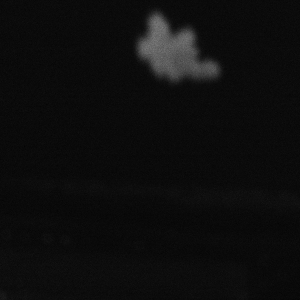

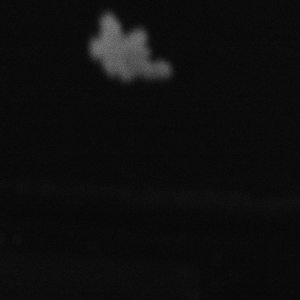

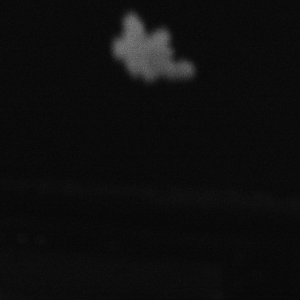

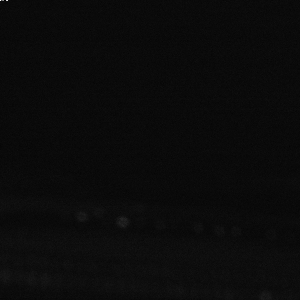

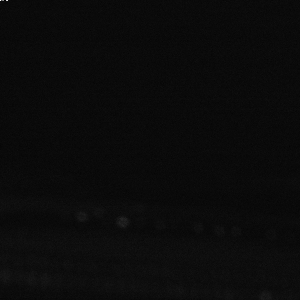

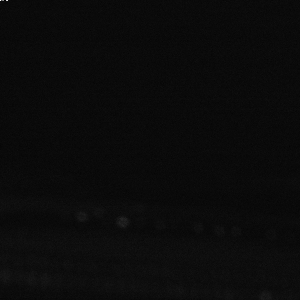

In [ ]:
filename = "/content/testFlake1.png"
imgCpy = cv.imread(filename, 0)

img = deepcopy(imgCpy)
hist = cv.calcHist([imgCpy],[0],None,[256],[0,256])
hist = np.asarray(hist).flatten()

ret,img2 = cv.threshold(img,threshold1,255,cv.THRESH_TOZERO)
  
# Use "max pooling" (If any pixels in window are high intensity, bring them all up to high intensity) to try to ensure box captures entire snowflake 
for i in range(0, len(img2)-stepSize2, stepSize2):
  for j in range(0, len(img2[i])-stepSize2, stepSize2):
    sum = 0
    for x in range(stepSize2):
      for y in range(stepSize2):
        sum += img2[i+x][j+y]
    if sum >= (stepSize2**2) * threshold3:
      for x in range(stepSize2):
        for y in range(stepSize2):
          img2[i+x][j+y] = 255
          
edges = cv.Canny(image=img2, threshold1=0, threshold2=250)
  
cnts = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
  x,y,w,h = cv.boundingRect(c)
        
  middleX = int(x + w/2)
  middleY = int(y + h/2)
    
  # Naive case, where snowflake is in center of image
  minX = middleX-int(dimensionX/2)
  minY = middleY-int(dimensionY/2)
    
  #Test to make sure dimensions won't be out of bounds
  if minX < 0:
    minX = 0
  if minY < 0:
    minY = 0
  if minX + dimensionX > len(img[0]):
    minX = len(img[0])-dimensionX-1
  if minY + dimensionY > len(img):
    minY = len(img)-dimensionY-1
      
  imgCropped = imgCpy[minY:minY + dimensionY, minX:minX+dimensionX]
  imgBoxed = deepcopy(img)
  cv.rectangle(imgBoxed, (x, y), (x + w, y + h), (36,255,12), 2)
    
  hist2 = cv.calcHist([imgCpy],[0],None,[256],[0,256])
  hist2 = np.asarray(hist2).flatten()
    
  cv2_imshow(imgCropped)
  print("")
  print("")